In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})

# Exploratory Data Analysis and Visualization

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Movie Review Classificaion/nepalimoviereviews.csv")

In [ ]:
data.sample(10)

,Reviews,Emotion
387,यस्तो झल्ला फ्लिम हेर्न भन्दा त कार्टुन हेरिन्छ ।,0.0
36,कथा राम्रो छ।,1.0
82,कति राम्रोहो यो फिलम धन्यबाद,1.0
568,"संदेश मुलुक प्रेरणादायी कथा बस्तु, निकै राम्रो...",1.0
483,वाह मजा आयो क्या राम्रो र सिम्पल कहानी ।अति सु...,1.0
601,धेरै रमाइलो यो फिलिम हेर्दता मोलाई नै खेलम भको,1.0
313,सक्छस भने पुरै नेपालीमा बना अनि राम्रो भन्छु,0.0
212,सहि लाग्यो मुभी पैसाले मातिएर इज्जत लुट्दै हिन...,1.0
395,सारै राम्रो फिल्म छ गजब राम्रो छ,1.0
518,जे होस चलचित्र राम्रै बनेको रहेछ ।बधाई छ ।प्रड...,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  602 non-null    object 
 1   Emotion  602 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [ ]:
print(f"There are {data.Emotion.nunique()} types of emotion." )

There are 2 types of emotion.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


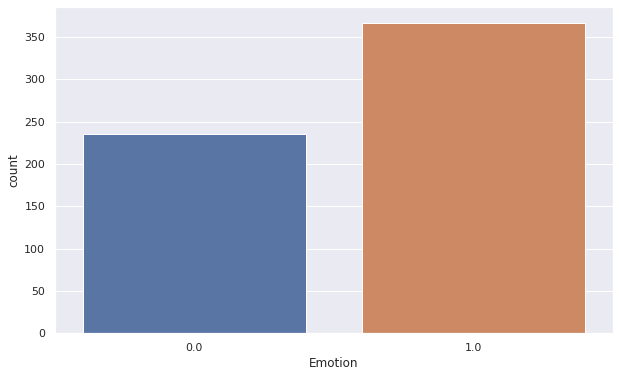

In [ ]:
sns.countplot(data.Emotion)

In [ ]:
data.Emotion.value_counts()

1.0    367
0.0    235
Name: Emotion, dtype: int64

# Text Preprocessing

*   Tokenize the words
*   Remove stopwords
*   stemming or lemmatization



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words('nepali'))

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [ ]:
!!pip install git+https://github.com/sushil79g/Nepali_nlp.git

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting git+https://github.com/sushil79g/Nepali_nlp.git',
 '  Cloning https://github.com/sushil79g/Nepali_nlp.git to /tmp/pip-req-build-01mdc47u',
 '  Running command git clone -q https://github.com/sushil79g/Nepali_nlp.git /tmp/pip-req-build-01mdc47u',
 'Collecting gensim==3.7.3',
 '  Downloading gensim-3.7.3-cp37-cp37m-manylinux1_x86_64.whl (24.2 MB)',
 '\x1b[?25l',
 '\x1b[K     |                                | 10 kB 21.9 MB/s eta 0:00:02',
 '\x1b[K     |                                | 20 kB 26.3 MB/s eta 0:00:01',
 '\x1b[K     |                                | 30 kB 12.7 MB/s eta 0:00:02',
 '\x1b[K     |                                | 40 kB 9.2 MB/s eta 0:00:03',
 '\x1b[K     |                                | 51 kB 4.1 MB/s eta 0:00:06',
 '\x1b[K     |                                | 61 kB 4.9 MB/s eta 0:00:05',
 '\x1b[K     |                                | 71 kB 5.

In [ ]:
from Nepali_nlp import Stem
text = "सरकारका प्रवक्ता प्रदीप ज्ञवालीले पनि गत बिहीबार उनलाई अनशन तोड्न आग्रह गरेका थिए"
Stem().rootify(text)

['सरकार',
 'प्रवक्ता',
 'प्रदीप',
 'ज्ञवाली',
 'पनि',
 'गत',
 'बिहीबार',
 'उन',
 'अनशन',
 'तोड्न',
 'आग्रह',
 'गर',
 '']

In [ ]:
text = ["आग्रह", "गरेका", "थिए"]
Stem().rootify(text)

['आग्रह', 'गर', '']

In [ ]:
!pip install nepalitokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nepalitokenizer import NepaliTokenizer

In [ ]:
tokenize = NepaliTokenizer()
print(tokenize.tokenizer('के छ खबर तिम्रो ? '))

['खबर', 'तिम्रो']


In [ ]:
def text_preprocessing(text):
  # Tokenize the reviews
  text = tokenize.tokenizer(text)
  # Remove the nepali stopwords
  text = [word for word in text if word not in stopwords.words('nepali')]
  # Stemming the nepali words
  text = Stem().rootify(text)
  text = ' '.join(text)
  return text

In [ ]:
data.columns

Index(['Reviews', 'Emotion'], dtype='object')

In [ ]:
data.Reviews[0]

'म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे । सामुदायिक विद्यालयमा अध्यापन गराउछु। मलाइ यो चलचित्रले मन नै छोयो । वास्तविक घटना यहि हो कि नेपालका तमाम सामुदायिक विद्यालय यहि समस्या बाट गुज्रीत छन । यस्तै शिक्षा सम्बन्धीको चलचित्र बनोस भनेर अपेक्षा गरेको थिए, आसा पूरा भयो । धन्यवाद सबै लाइ'

In [ ]:
text_preprocessing(data.Reviews[0])

'शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद '

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  602 non-null    object 
 1   Emotion  602 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.1+ KB


In [ ]:
data.isna().sum()

Reviews    0
Emotion    0
dtype: int64

# Text Vectorization

In [ ]:
X = data["Reviews"]
y = data["Emotion"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 10000, ngram_range = (1, 2))

In [ ]:
tfidf_vectorizer = tfidf.fit(X_train)

In [ ]:
print(len(tfidf_vectorizer.vocabulary_))

913


In [ ]:
X_train = tfidf_vectorizer.transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred = nb_classifier.predict(X_test)

In [ ]:
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy Score : {score}")

Accuracy Score : 0.6141078838174274


In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[ 10, 184],
       [  2, 286]])